# Garmin Cycling Report

In [24]:
import tcxtools
from helper import overlay_graph, mean_graph, overlay_hist, overlay_timeseries, get_sec
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# TCX and CSV files name without extension

In [25]:
filename = 'activity_5173186556'

# Reading .TCX file

In [26]:
tcx_data = tcxtools.TCXPandas('./cycling/' + filename + '.tcx')
tracks, laps = tcx_data.parse()
tracks = tracks.set_index('time')

# Reading .CSV file

In [27]:
csv_data = pd.read_csv('./cycling/' + filename + '.csv')

# Calculating time in seconds
csv_data['Time (s)'] = csv_data['Time'].apply(get_sec)

# Calculating Power in watts
csv_data['Power (w)'] = csv_data['Calories'] * 4184 / csv_data['Time (s)']

# Calculating Energy in kilojoules per second
csv_data['Energy (kj)'] = (csv_data['Power (w)'] * csv_data['Time (s)']) / 1000

csv_data

,Laps,Time,Cumulative Time,Distance,Avg Speed,Avg HR,Max HR,Elev Gain,Elev Loss,Calories,Max Speed,Moving Time,Avg Moving Speed,Time (s),Power (w),Energy (kj)
0,1,19:18,19:18,5.00,15.5,129,145,79,73,149,47.6,19:07,15.7,1158,538.355786,623.416
1,2,15:44,35:01,5.00,19.1,131,151,51,77,112,40.6,15:44,19.1,944,496.406780,468.608
2,3,17:06,52:07,5.00,17.6,131,145,47,50,111,41.8,16:48,17.9,1026,452.654971,464.424
3,4,15:08,1:07:15,4.05,16.1,135,148,56,31,103,45.5,14:44,16.5,908,474.616740,430.952
4,Summary,1:07:15,1:07:15,19.05,17.0,131,151,233,231,475,47.6,1:06:23,17.2,4035,492.540273,1987.400


In [28]:
csv = csv_data.head(-1)
csv_summary = csv_data.tail(1)

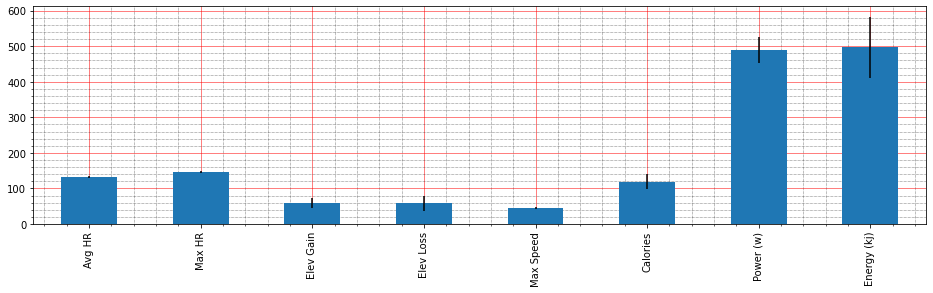

In [29]:
mean_graph(csv[['Avg HR', 'Max HR', 'Elev Gain', 'Elev Loss', 'Max Speed', 'Calories', 'Power (w)', 'Energy (kj)']])

# Tracking points

In [30]:
tracks.dropna(inplace=True)
tracks

,distance,hr,latitude,longitude,altitude,speed (m/s),speed (km/h)
time,,,,,,,
2020-07-01 15:30:54+00:00,0.000000,114,-15.836310,-48.020298,1137.199951,2.930,10.5480
2020-07-01 15:31:00+00:00,23.700001,114,-15.836360,-48.020512,1136.400024,2.865,10.3140
2020-07-01 15:31:03+00:00,32.950001,110,-15.836415,-48.020582,1136.400024,2.855,10.2780
2020-07-01 15:31:04+00:00,36.540001,107,-15.836439,-48.020610,1136.400024,2.976,10.7136
2020-07-01 15:31:05+00:00,39.110001,104,-15.836488,-48.020628,1136.599976,2.967,10.6812
...,...,...,...,...,...,...,...
2020-07-01 16:42:36+00:00,19030.820312,139,-15.836800,-48.020243,1139.000000,3.630,13.0680
2020-07-01 16:42:42+00:00,19050.230469,139,-15.836952,-48.020152,1139.400024,1.922,6.9192
2020-07-01 16:42:47+00:00,19052.009766,135,-15.836945,-48.020129,1139.400024,0.802,2.8872


# Total Distance (meters)

In [31]:
round(tracks['distance'].tail(1).values[0], 3)

19052.49

# Speed (km/h) per Tracking Point

In [32]:
tracks['speed (km/h)'].describe()

count    1067.000000
mean       18.267473
std         8.824164
min         0.000000
25%        11.151000
50%        16.862400
75%        23.749200
max        46.220399
Name: speed (km/h), dtype: float64

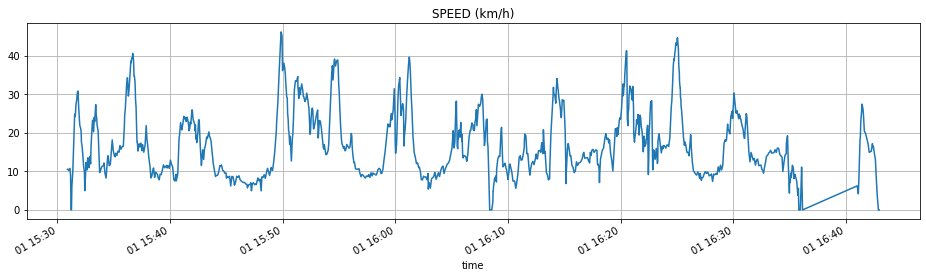

In [33]:
graph = tracks['speed (km/h)']
graph.astype(float).plot(figsize=(16,4))
plt.title('SPEED (km/h)')
plt.grid()

# Speed (km/h) per Lap

In [34]:
csv[['Avg Speed', 'Max Speed']].describe()

,Avg Speed,Max Speed
count,4.000000,4.000000
mean,17.075000,43.875000
std,1.613227,3.242813
min,15.500000,40.600000
25%,15.950000,41.500000
50%,16.850000,43.650000
75%,17.975000,46.025000
max,19.100000,47.600000


# Power (watts)

In [35]:
csv['Power (w)'].describe()

count      4.000000
mean     490.508569
std       36.558584
min      452.654971
25%      469.126298
50%      485.511760
75%      506.894031
max      538.355786
Name: Power (w), dtype: float64

# Power (w) vs Speed (km/h)

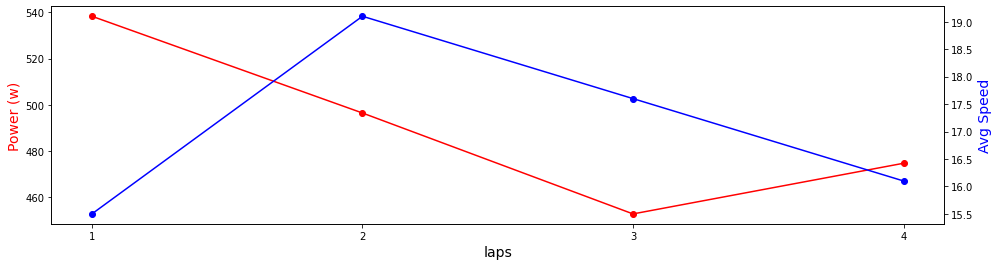

In [36]:
overlay_graph(csv.Laps, csv['Power (w)'], csv['Avg Speed'])

# Energy (kj/s)

In [37]:
csv['Energy (kj)'].describe()

count      4.0000
mean     496.8500
std       86.0437
min      430.9520
25%      456.0560
50%      466.5160
75%      507.3100
max      623.4160
Name: Energy (kj), dtype: float64

# Energy (kj) vs Power (watts)

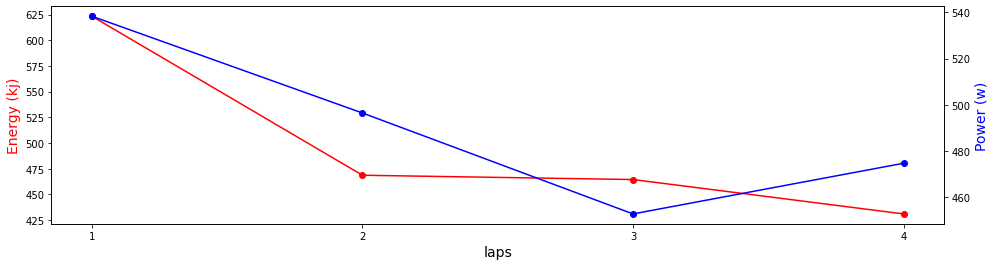

In [39]:
overlay_graph(csv.Laps, csv['Energy (kj)'], csv['Power (w)'])

# Energy (kj) vs Speed (km/h)

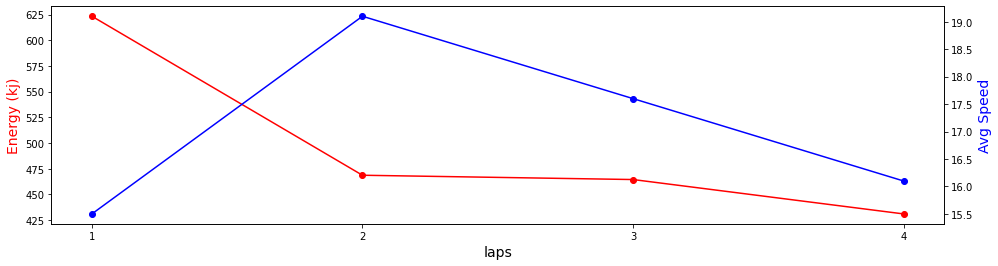

In [40]:
overlay_graph(csv.Laps, csv['Energy (kj)'], csv['Avg Speed'])

# Heart Rate (bpm)

In [41]:
tracks['hr'].describe()

count    1067.000000
mean      128.989691
std        10.632126
min       101.000000
25%       121.000000
50%       132.000000
75%       137.000000
max       150.000000
Name: hr, dtype: float64

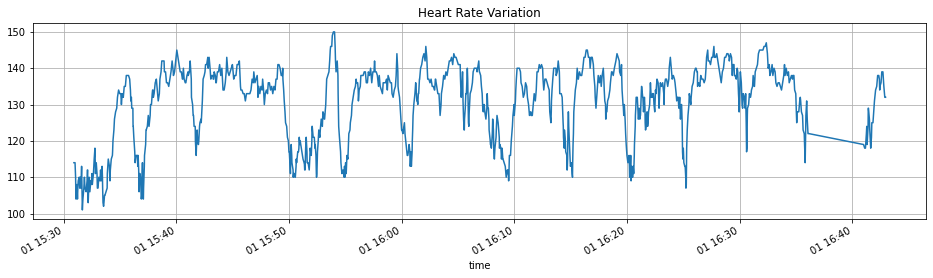

In [43]:
graph = tracks['hr']
graph.astype(float).plot(figsize=(16,4))
plt.title('Heart Rate Variation')
plt.grid()

# Avg Heart Rate vs Power

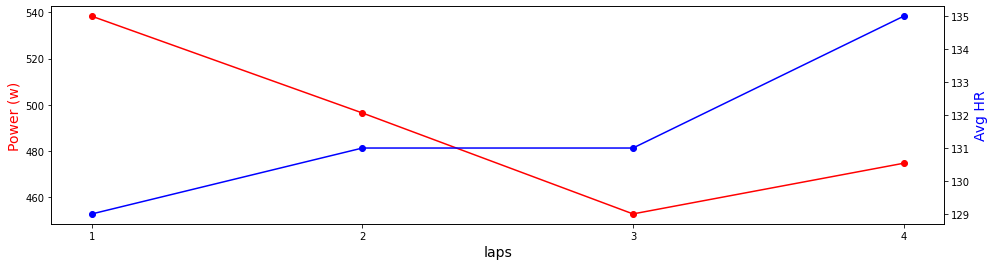

In [44]:
overlay_graph(csv.Laps, csv['Power (w)'], csv["Avg HR"])

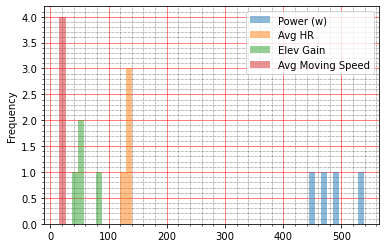

In [45]:
overlay_hist(csv[['Power (w)', 'Avg HR', 'Elev Gain', 'Avg Moving Speed']])

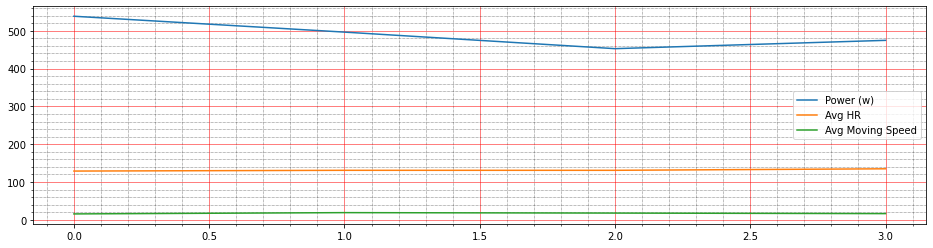

In [46]:
overlay_timeseries(csv[['Power (w)', 'Avg HR', 'Avg Moving Speed']])